In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore');

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("../DATA/authors_train.csv")
test = pd.read_csv("../DATA/authors_test.csv")

data.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [3]:
data.shape
data["author"].value_counts()

author
EAP    7900
MWS    6044
HPL    5635
Name: count, dtype: int64

In [4]:
# add a rough count of words in the sentences as a feature
data['word_length'] = data.text.str.count(' ')
data.head()

,id,text,author,word_length
0,id26305,"This process, however, afforded me no means of...",EAP,40
1,id17569,It never once occurred to me that the fumbling...,HPL,13
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,35
3,id27763,How lovely is spring As we looked from Windsor...,MWS,33
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,26


In [5]:
# look at some of the writing from edgar allen poe
data[data["author"] == "EAP"]["word_length"].describe()

count    7900.000000
mean       24.442405
std        18.567706
min         1.000000
25%        11.000000
50%        20.000000
75%        32.000000
max       266.000000
Name: word_length, dtype: float64

Box plot with  word length per author

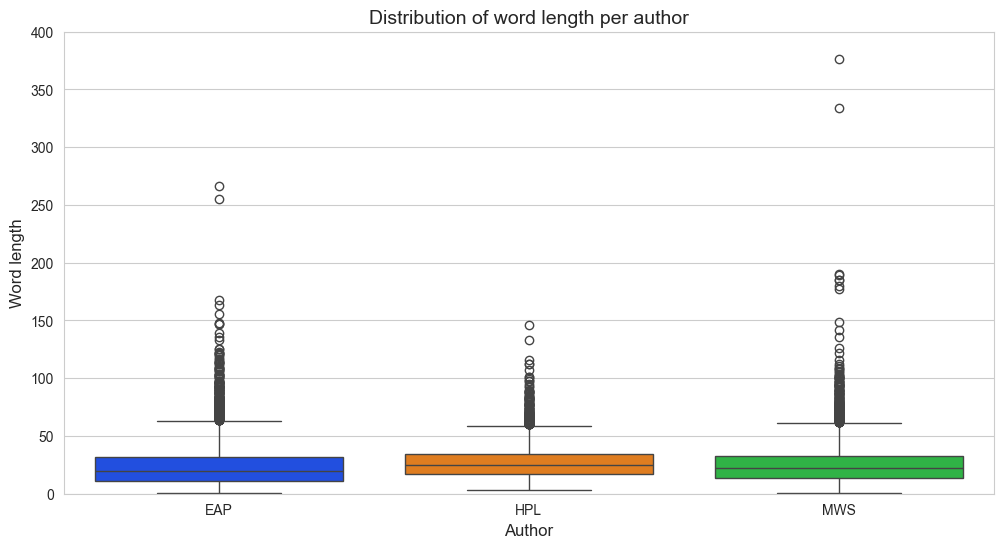

In [6]:
plt.figure(figsize=(12, 6))  
sns.set_style("whitegrid")  
sns.boxplot(
    x="author",
    y="word_length",
    data=data,
    hue="author",  
    palette='bright',
    legend=False  
)

plt.ylim(0, 400)
plt.title("Distribution of word length per author", fontsize=14)
plt.xlabel("Author", fontsize=12)
plt.ylabel("Word length", fontsize=12)

plt.show()

In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.stem.porter import *
from nltk.tokenize import RegexpTokenizer

# Tokenize: create words from sentences, and removes punctuation
tokenizer = RegexpTokenizer(r'\w+')
data['tokens'] = data.apply(lambda x: tokenizer.tokenize(x['text']), axis = 1)
data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SLO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SLO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,text,author,word_length,tokens
0,id26305,"This process, however, afforded me no means of...",EAP,40,"[This, process, however, afforded, me, no, mea..."
1,id17569,It never once occurred to me that the fumbling...,HPL,13,"[It, never, once, occurred, to, me, that, the,..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,35,"[In, his, left, hand, was, a, gold, snuff, box..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,33,"[How, lovely, is, spring, As, we, looked, from..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,26,"[Finding, nothing, else, not, even, gold, the,..."
...,...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,19,"[I, could, have, fancied, while, I, looked, at..."
19575,id08973,The lids clenched themselves together as if in...,EAP,9,"[The, lids, clenched, themselves, together, as..."
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,12,"[Mais, il, faut, agir, that, is, to, say, a, F..."
19577,id17513,"For an item of news like this, it strikes us i...",EAP,14,"[For, an, item, of, news, like, this, it, stri..."


In [8]:
# These are the stop words provided by nltk, the library we will be using in this example
from nltk.corpus import stopwords
nltkstop=stopwords.words('english')
print(len(nltkstop), "stop words provided by nltk: ")
print()
print(nltkstop)

198 stop words provided by nltk: 

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 

In [9]:
# Remove stop words
data['tokens'] = data['tokens'].apply(lambda x: [item for item in x if item not in nltkstop])
data

,id,text,author,word_length,tokens
0,id26305,"This process, however, afforded me no means of...",EAP,40,"[This, process, however, afforded, means, asce..."
1,id17569,It never once occurred to me that the fumbling...,HPL,13,"[It, never, occurred, fumbling, might, mere, m..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,35,"[In, left, hand, gold, snuff, box, capered, hi..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,33,"[How, lovely, spring, As, looked, Windsor, Ter..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,26,"[Finding, nothing, else, even, gold, Superinte..."
...,...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,19,"[I, could, fancied, I, looked, eminent, landsc..."
19575,id08973,The lids clenched themselves together as if in...,EAP,9,"[The, lids, clenched, together, spasm]"
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,12,"[Mais, il, faut, agir, say, Frenchman, never, ..."
19577,id17513,"For an item of news like this, it strikes us i...",EAP,14,"[For, item, news, like, strikes, us, coolly, r..."


In [10]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

data['tokens'] = data['tokens'].apply(lambda x: [stemmer.stem(item) for item in x])
data
data.to_excel("output/data_stemming.xlsx")

In [11]:
import spacy
nlp = spacy.load("en_core_web_sm")

def lemmatize_spacy(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

data['tokens'] = data['tokens'].apply(lemmatize_spacy)
data
data.to_excel("output/data_lemmatization.xlsx")

KeyboardInterrupt: 

In [ ]:
data['tokens'] = data['tokens'].apply(lambda x: ' '.join(x))
data

,id,text,author,word_length,tokens
0,id26305,"This process, however, afforded me no means of...",EAP,40,this process howev afford mean ascertain dimen...
1,id17569,It never once occurred to me that the fumbling...,HPL,13,it never occur fumbl might mere mistak
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,35,in left hand gold snuff box caper hill cut man...
3,id27763,How lovely is spring As we looked from Windsor...,MWS,33,how love spring as look windsor terrac sixteen...
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,26,find noth el even gold superintend abandon att...
...,...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,19,I could fanci I look emin landscap painter bui...
19575,id08973,The lids clenched themselves together as if in...,EAP,9,the lid clench togeth spasm
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,12,mai il faut agir say frenchman never faint out...
19577,id17513,"For an item of news like this, it strikes us i...",EAP,14,for item news like strike we coolli receiv


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Make split
x_train, x_test, y_train, y_test = train_test_split(
    data['tokens'], 
    data['author'], 
    test_size= 0.3
    )

In [ ]:
print("Training data set size: ", len(x_train))
print("Testing data set size: ", len(x_test))

Training data set size:  13705
Testing data set size:  5874


In [ ]:
vectorizer = CountVectorizer( # Initialize the "CountVectorizer" object, which is scikit-learn's Bag of Words tool.  
    strip_accents = 'ascii', 
    lowercase = True
    )

vectorizer_fit = vectorizer.fit(x_train)
x_train_transformed = vectorizer_fit.transform(x_train)
x_test_transformed = vectorizer_fit.transform(x_test)
x_test_transformed

<5874x13318 sparse matrix of type '<class 'numpy.int64'>'
	with 76829 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.naive_bayes import MultinomialNB 

naive_bayes = MultinomialNB()
naive_bayes_fit = naive_bayes.fit(x_train_transformed, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

# Make predictions
train_predict = naive_bayes_fit.predict(x_train_transformed)
test_predict = naive_bayes_fit.predict(x_test_transformed)

def get_scores(y_real, predict):
  ba_train = balanced_accuracy_score(y_real, predict)
  return ba_train

def print_scores(scores):
  return f"Balanced Accuracy: {scores}"

train_scores = get_scores(y_train, train_predict)
test_scores = get_scores(y_test, test_predict)

print("## Train Accuracy")
print(print_scores(f"{train_scores:.2%}"))
print("\n## Test Accuracy")
print(print_scores(f"{test_scores:.2%}"))

## Train Accuracy
Balanced Accuracy: 89.90%

## Test Accuracy
Balanced Accuracy: 82.81%


Confusion Matrix


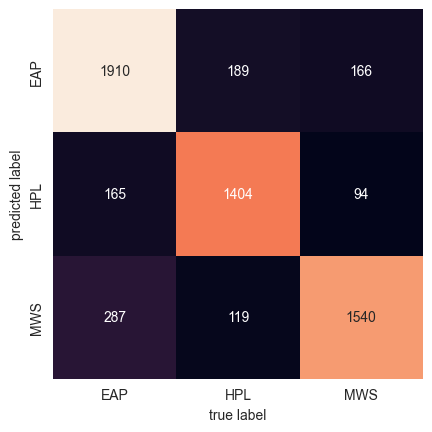

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Confusion Matrix")
mat = confusion_matrix(y_test, test_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=naive_bayes_fit.classes_, yticklabels=naive_bayes_fit.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');